In [58]:
import numpy as np
from  sklearn.datasets  import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report

# load data

In [2]:
iris = load_iris()

## EDA

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [24]:
#CREATE DATAFRAME out of numpy array 
data_frame = pd.DataFrame(iris.data)
data_frame.columns = iris.feature_names
data_frame["plant type"] = list(map(lambda i: iris.target_names[i],iris.target))

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   plant type         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
data_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


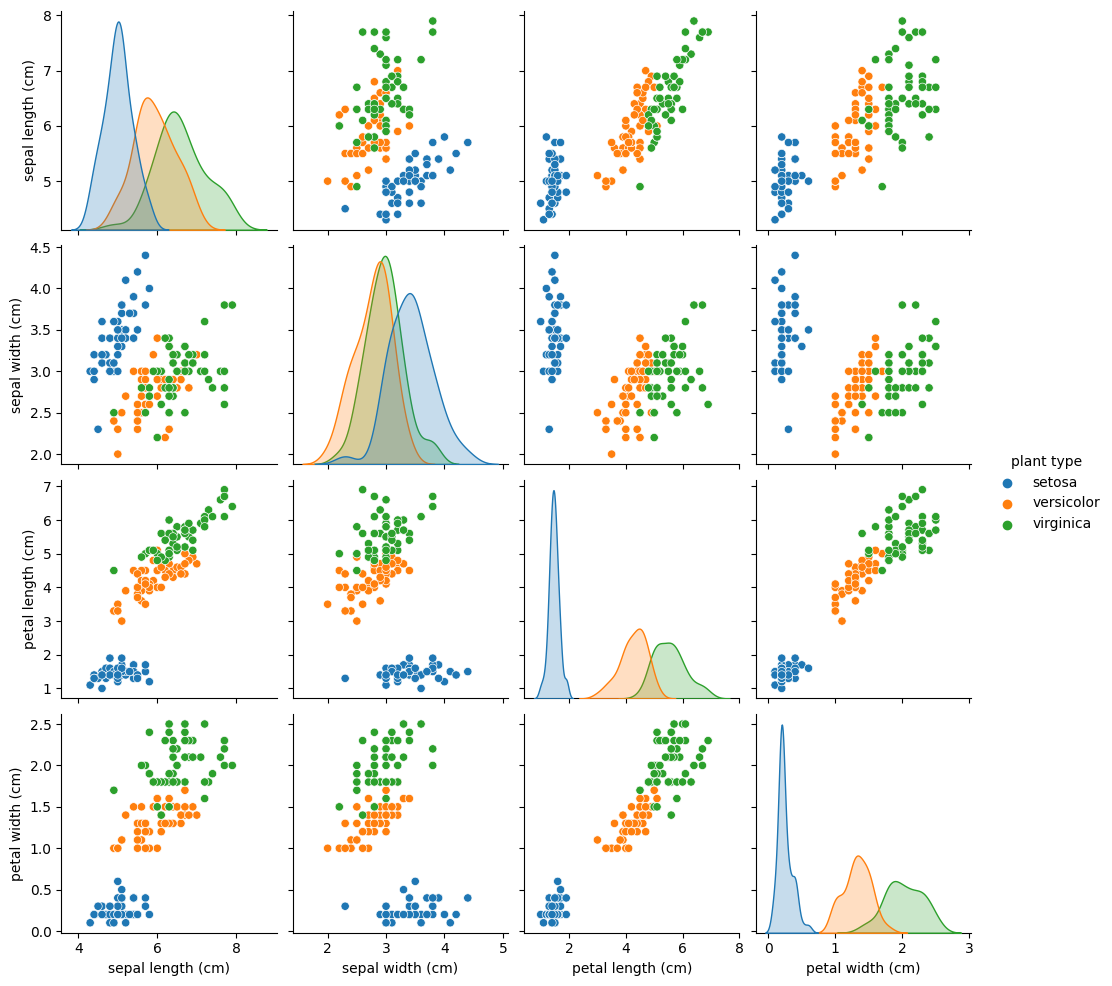

In [27]:
# draw pair plot to understand the correlation b/w features
sns.pairplot(data_df, hue="plant type")

# data preparation

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size=0.20,stratify=iris.target,random_state=42)

# Modeling

## linear support  vector classifier 

In [33]:
# A pipeline is a sequence of data processing steps, where each step is defined as a tuple with a name and an estimator.
linear_svc_pipeline = Pipeline([
("scaler",StandardScaler()),
    ("linear svc",LinearSVC(C=1,loss="hinge",random_state=42))
    ])
#StandardScaler scales the features to have zero mean and unit variance, 
#which can improve the performance of the SVM classifier.

#C is the regularization parameter that controls 
#the trade-off between maximizing the margin and minimizing the training error.

In [35]:
linear_svc_cross_val_score = cross_val_score(linear_svc_pipeline,X_train,Y_train, scoring = "accuracy",cv=5,n_jobs=-1)

In [36]:
print("score: ",linear_svc_cross_val_score)
print("mean: ",np.mean(linear_svc_cross_val_score))
print("std: ",np.std(linear_svc_cross_val_score))

score:  [0.95833333 0.95833333 0.875      0.91666667 1.        ]
mean:  0.9416666666666668
std:  0.042491829279939886


## Non linear svc

### polynomial degree 3

In [48]:
poly_svc =  Pipeline([
    ("poly feat",PolynomialFeatures(degree=3)),
("scaler",StandardScaler()),
    ("poly_kernal_svc",SVC(C=1,kernel="poly",degree=3,coef0=1))
    ])

In [49]:
poly_cross_val = cross_val_score(poly_svc,X_train,Y_train,scoring="accuracy",cv=5,n_jobs=-1)

In [50]:
print("score: ",poly_cross_val)
print("mean: ",np.mean(poly_cross_val))
print("std: ",np.std(poly_cross_val))

score:  [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]
mean:  0.9583333333333334
std:  0.026352313834736508


### perform the same for poly degree 2

In [51]:
rbf_kernel_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf_kernel_svc", SVC(kernel="rbf", gamma=0.1, C=1))
    ])

In [54]:
rbf_kernel_svm_cross_val_scores = cross_val_score(
    rbf_kernel_svm_pipeline, X_train, Y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [55]:
# Print the cross-validation scores
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    rbf_kernel_svm_cross_val_scores, 
    np.mean(rbf_kernel_svm_cross_val_scores), 
    np.std(rbf_kernel_svm_cross_val_scores)))

Scores: [0.91666667 1.         0.95833333 1.         1.        ]
Mean Score: 0.975, Mean Score Std. Dev.: 0.03333333333333334


# hyper parameter tunning

In [62]:
grid_search_params = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

# Configures grid search for all combinations of hyperparameter values
grid = GridSearchCV(
    SVC(),               # Classifier with default values
    grid_search_params, 
    refit = True,        # Keeps the reference to model with best parameters for later use
    n_jobs=-1,
    verbose=3
)

# Performs the grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

# performance evaluation

In [63]:
test_predictions = grid.predict(X_test)

In [64]:
# Prints the best parameters
print(grid.best_params_)

{'C': 1, 'gamma': 0.1}


In [65]:
# Prints the best score during grid search
print(grid.best_score_)

0.9833333333333334


In [66]:
# test_predictions = grid.predict(X_test)

In [68]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

